In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [30]:
f1 = r.TFile("./data/withTimeCorrection.root")
t1 = f1.Get("nearlineHistTree/eventTree")

f2 = r.TFile("./data/noTimeCorrection.root")
t2 = f2.Get("nearlineHistTree/eventTree")

t2.SetLineColor(2)
t2.SetMarkerColor(2)

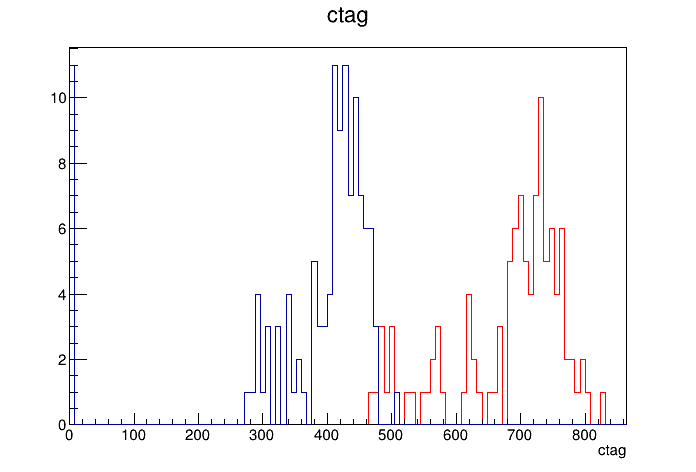

In [3]:
c = r.TCanvas()

t2.Draw("ctag")
t1.Draw("ctag","","same")

c.Draw()

[33, 51, 89, 127, 141, 153, 167, 203, 209, 225, 235]


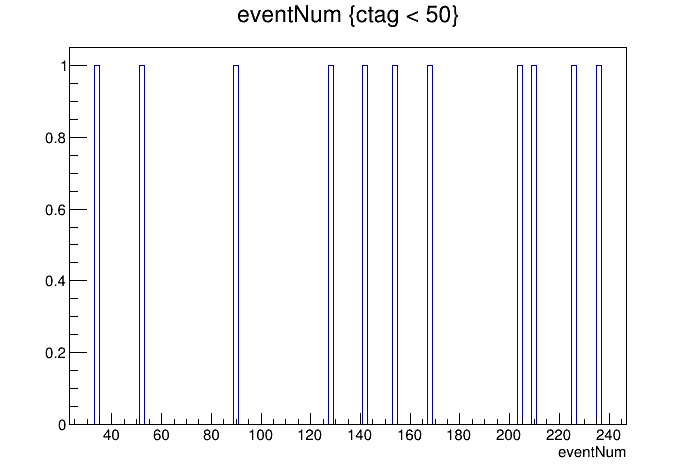

In [40]:
c = r.TCanvas()

ding = t1.Draw("eventNum", "ctag < 50")
badFills = []
for x in range(ding):
    badFills.append(int(t1.GetV1()[x]))
print(badFills)

c.Draw()

In [44]:
fillcut = " ( "
for fill in badFills:
    fillcut+=" eventNum == "+str(fill)+" || "
fillcut = fillcut[:-3]+" )"
print(fillcut)

 (  eventNum == 33 ||  eventNum == 51 ||  eventNum == 89 ||  eventNum == 127 ||  eventNum == 141 ||  eventNum == 153 ||  eventNum == 167 ||  eventNum == 203 ||  eventNum == 209 ||  eventNum == 225 ||  eventNum == 235  )


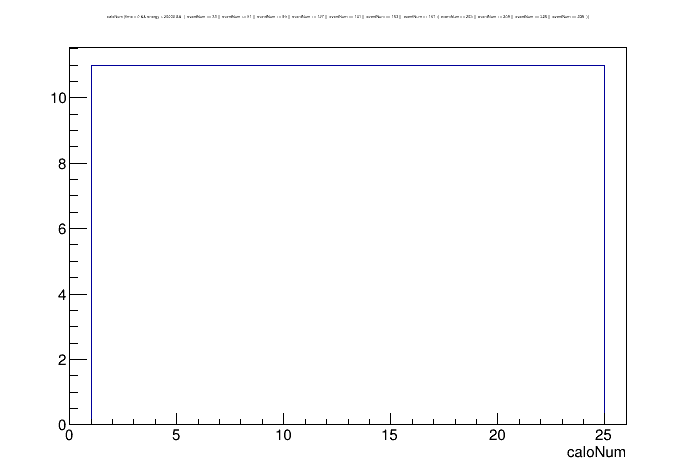

In [49]:
c = r.TCanvas()

t1.Draw("caloNum", "time < 0 && energy > 20000 && "+fillcut, "")

c.Draw()

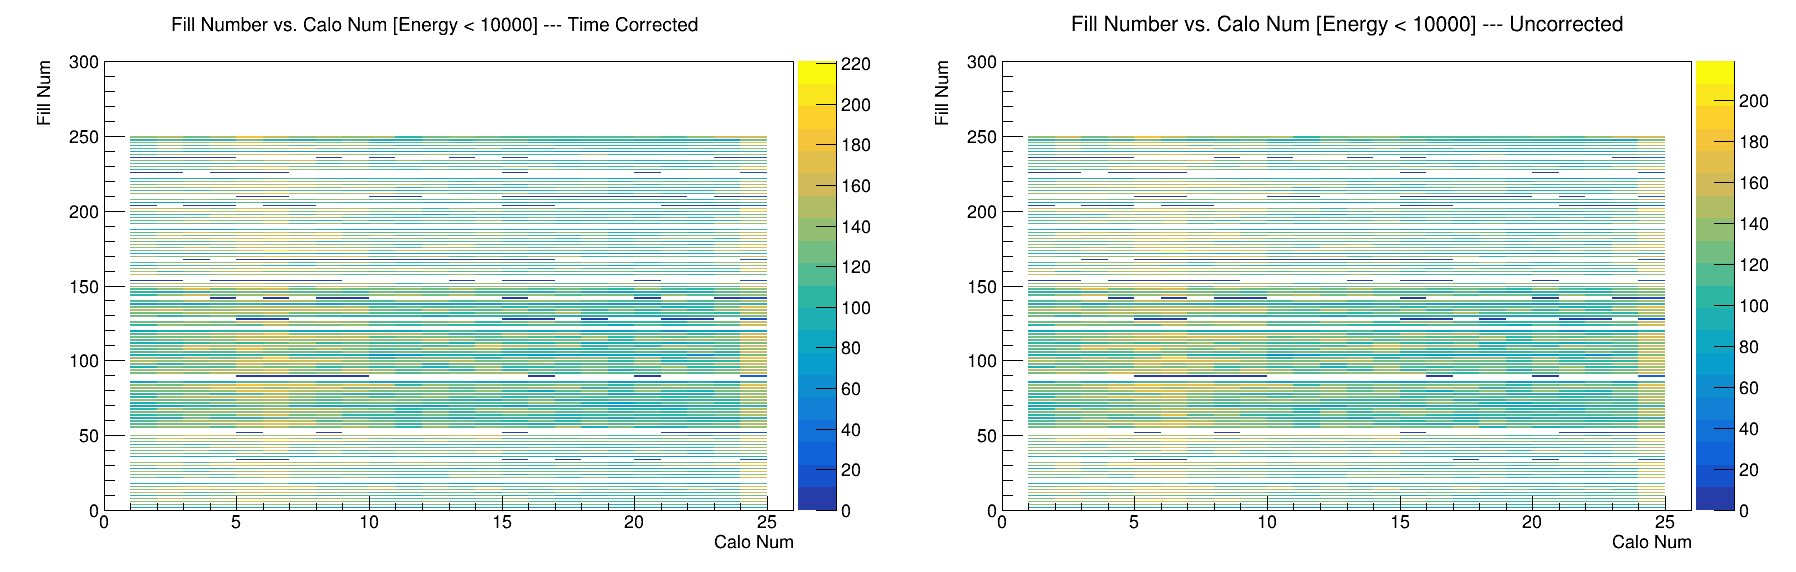

In [5]:
c = r.TCanvas("c","c",1800,600)
c.Divide(2)
c.cd(1)

h1 = r.TH2D("h1","Fill Number vs. Calo Num [Energy < 10000] --- Time Corrected; Calo Num; Fill Num",26,0,26,300,0,300)
t1.Draw("eventNum:caloNum>>h1","energy < 10000 ","colz")

h2 = h1.Clone("h2")
h2.SetTitle("Fill Number vs. Calo Num [Energy < 10000] --- Uncorrected")
h2.Reset()
c.cd(2)
t2.Draw("eventNum:caloNum>>h2","energy < 10000","colz")

c.Draw()

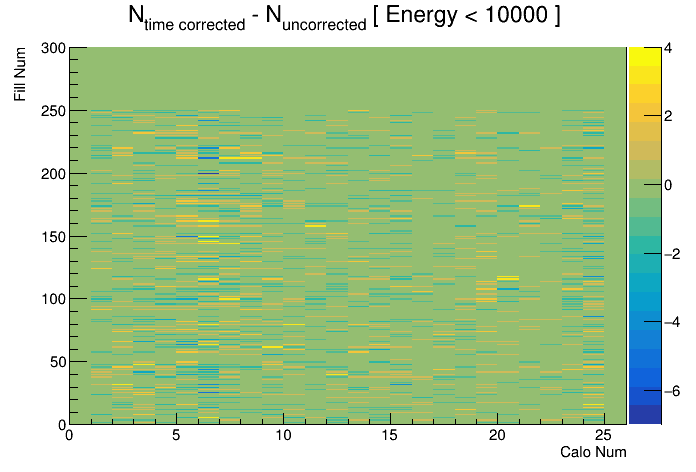

In [6]:
hdiff = h2.Clone("hdiff")
hdiff.SetTitle("N_{time corrected} - N_{uncorrected} [ Energy < 10000 ]")
hdiff.Add(h1,-1)

c = r.TCanvas()

hdiff.Draw("colz")

#c.SetLogz()
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).


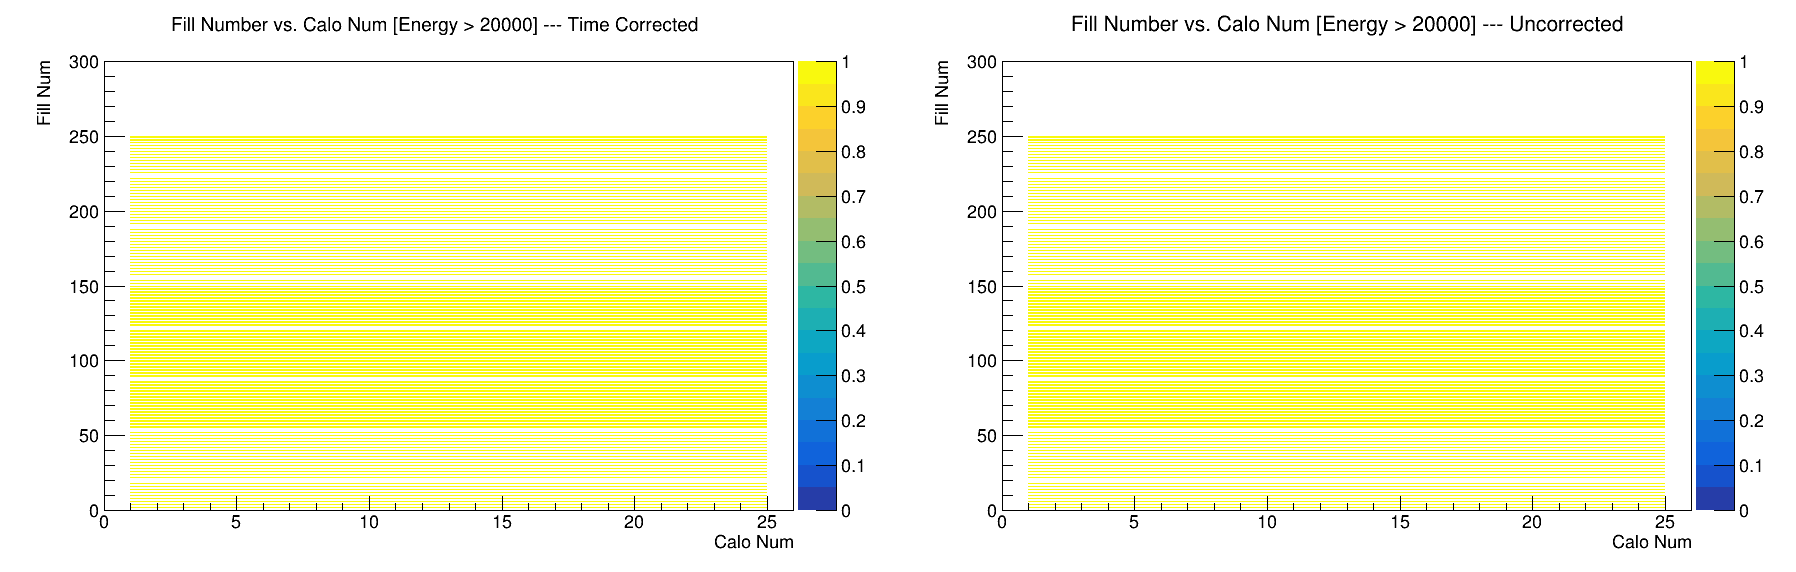

In [7]:
c = r.TCanvas("c","c",1800,600)
c.Divide(2)
c.cd(1)

h1 = r.TH2D("h1","Fill Number vs. Calo Num [Energy > 20000] --- Time Corrected; Calo Num; Fill Num",26,0,26,300,0,300)
t1.Draw("eventNum:caloNum>>h1",
        "energy > 20000 && time < 0",
        #"energy > 10000",
        "colz")

h2 = h1.Clone("h2")
h2.SetTitle("Fill Number vs. Calo Num [Energy > 20000] --- Uncorrected")
h2.Reset()
c.cd(2)
t2.Draw("eventNum:caloNum>>h2",
        "energy > 20000 && time < 20000",
        #"energy > 10000",
        "colz")

c.Draw()

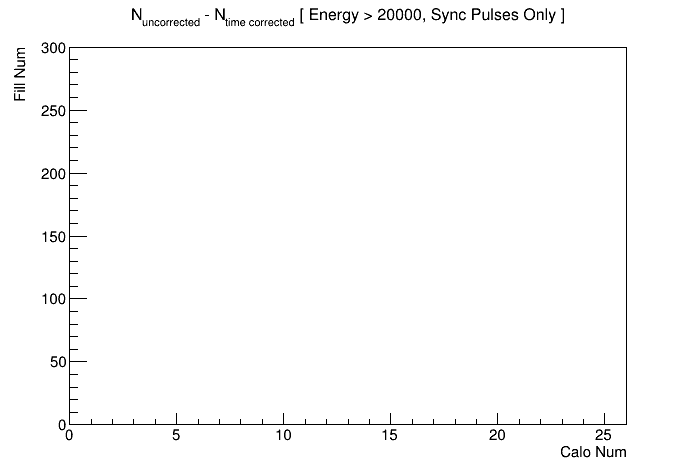

In [8]:
hdiff = h2.Clone("hdiff")
hdiff.Add(h1,-1)
hdiff.SetTitle("N_{uncorrected} - N_{time corrected} [ Energy > 20000, Sync Pulses Only ]")
#hdiff.GetZaxis().SetRangeUser(0,5)

c = r.TCanvas()

hdiff.Draw("")

#c.SetLogz()
c.Draw()

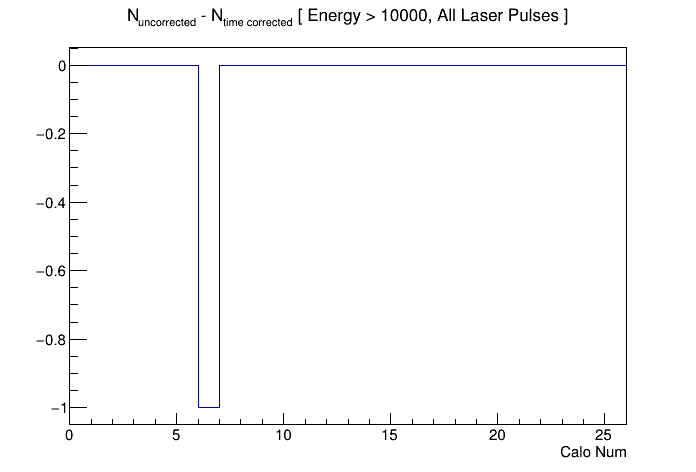

In [29]:
c = r.TCanvas()
hd_y = hdiff.ProjectionX()
hd_y.Draw()
c.Draw()

In [30]:
fills = []
for i in range(hd_y.GetNbinsX()):
    content = hd_y.GetBinContent(i+1)
    if(content != 0):
        print(i, int(content))
        fills.append(i)

6 -1


In [26]:
cut = " && ( "
for fill in fills:
    cut+=" eventNum == "+str(fill)+" || "

print(cut)

 && (  eventNum == 145 ||  )


47892.033701291024 152745.57619322246


Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).


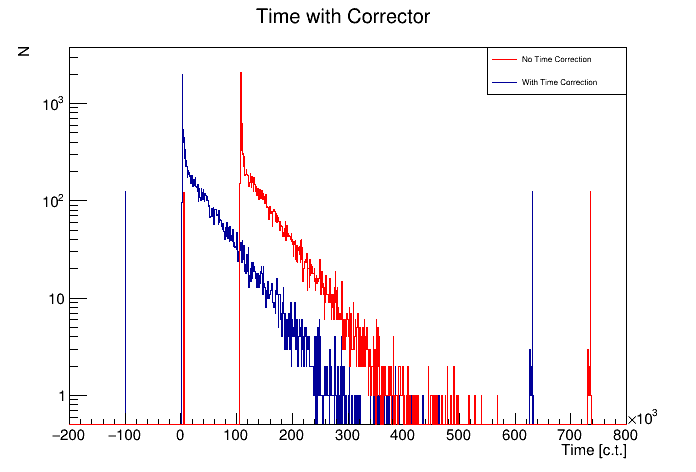

In [11]:
c = r.TCanvas()

h1 = r.TH1D("h1","Time with Corrector; Time [c.t.]; N", 1000, -200000, 800000)
h2 = h1.Clone("h2")
#h1.SetTitle("Fills: "+str(fills))
h2.SetLineColor(2)

t1.Draw("time>>h1", "energy > 0 && (  eventNum == 55 ||  eventNum == 63 ||  eventNum == 123 ||  eventNum == 133 ||  eventNum == 233 )")
t2.Draw("time>>h2","energy > 0 && (  eventNum == 55 ||  eventNum == 63 ||  eventNum == 123 ||  eventNum == 133 ||  eventNum == 233 )","same")


m1 = h1.GetMean()
m2 = h2.GetMean()
print(m1,m2)

h3 = h1.Clone("h3")
h3.Reset()
h3.SetTitle("Time without Corrector [Corrected]")
h3.SetLineColor(6)

t2.Draw("time - "+str(m2-m1)+">>h3","","goff")

leg = r.TLegend(0.7,0.8,0.9,0.9)
leg.AddEntry(h2, "No Time Correction", "l")
leg.AddEntry(h1, "With Time Correction", "l")
leg.Draw("SAME")

c.SetLogy()

c.Draw()

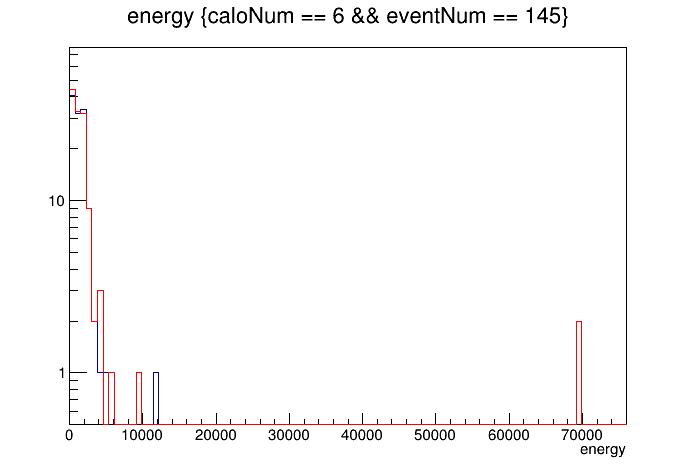

In [37]:
c = r.TCanvas()
t1.Draw("energy","caloNum == 6 && eventNum == 145")
t2.Draw("energy","caloNum == 6 && eventNum == 145","same")
c.SetLogy()
c.Draw()

In [42]:
t1.Print()

******************************************************************************
*Tree    :eventTree : eventTree                                              *
*Entries :      118 : Total =        11593004 bytes  File  Size =    8649185 *
*        :          : Tree compression factor =   1.34                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :      118 : Total  Size=       1039 bytes  File Size  =        104 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   5.29     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :      118 : Total  Size=       1058 bytes  File Size  =        107 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   5.17     *
*...................................................

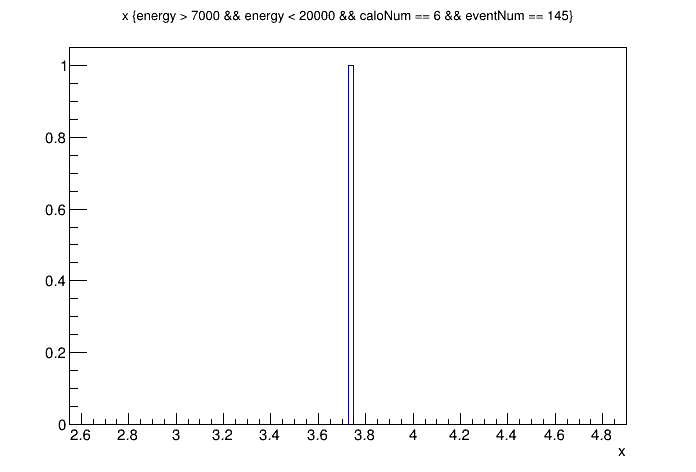

In [48]:
c = r.TCanvas()
t1.Draw("x","energy > 7000 && energy < 20000 && caloNum == 6 && eventNum == 145")
c.Draw()

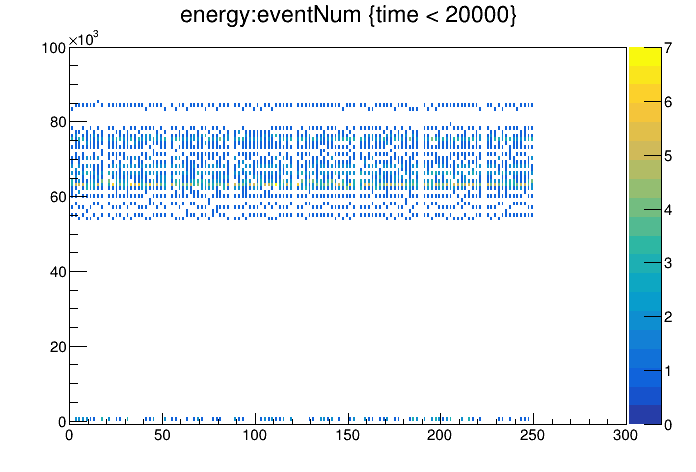

In [32]:
c = r.TCanvas()

t2.Draw("energy:eventNum>>hist(300,0,300,100,-1000,100000)","time < 20000","colz")

#c.SetLogz()
c.Draw()

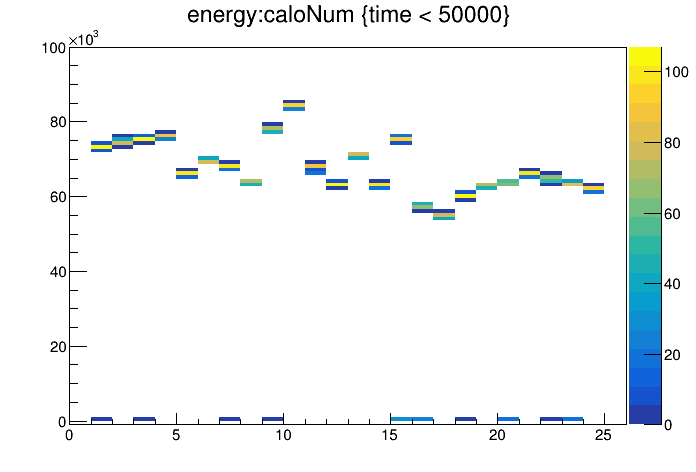

In [13]:
c = r.TCanvas()

t2.Draw("energy:caloNum>>hist(26,0,26,100,-1000,100000)","time < 50000","colz")

#c.SetLogz()
c.Draw()

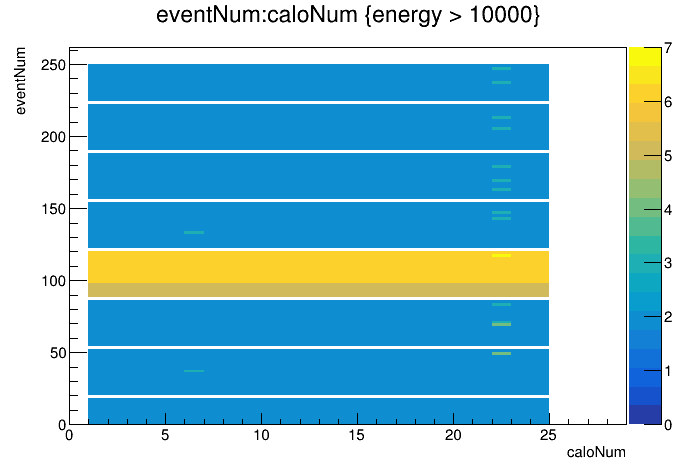

In [14]:
c = r.TCanvas()

t2.Draw("eventNum:caloNum","energy > 10000","colz")

c.Draw()

49421.52611158517 154231.1076163402


Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).


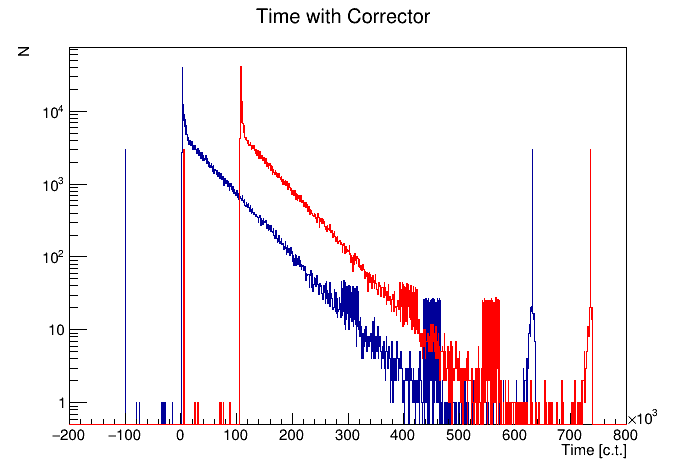

In [15]:
c = r.TCanvas()

h1 = r.TH1D("h1","Time with Corrector; Time [c.t.]; N", 1000, -200000, 800000)
h2 = h1.Clone("h2")
h2.SetTitle("Time without Corrector")
h2.SetLineColor(2)

t1.Draw("time>>h1")
t2.Draw("time>>h2","","same")


m1 = h1.GetMean()
m2 = h2.GetMean()
print(m1,m2)

h3 = h1.Clone("h3")
h3.Reset()
h3.SetTitle("Time without Corrector [Corrected]")
h3.SetLineColor(6)

t2.Draw("time - "+str(m2-m1)+">>h3","","goff")

c.SetLogy()

c.Draw()

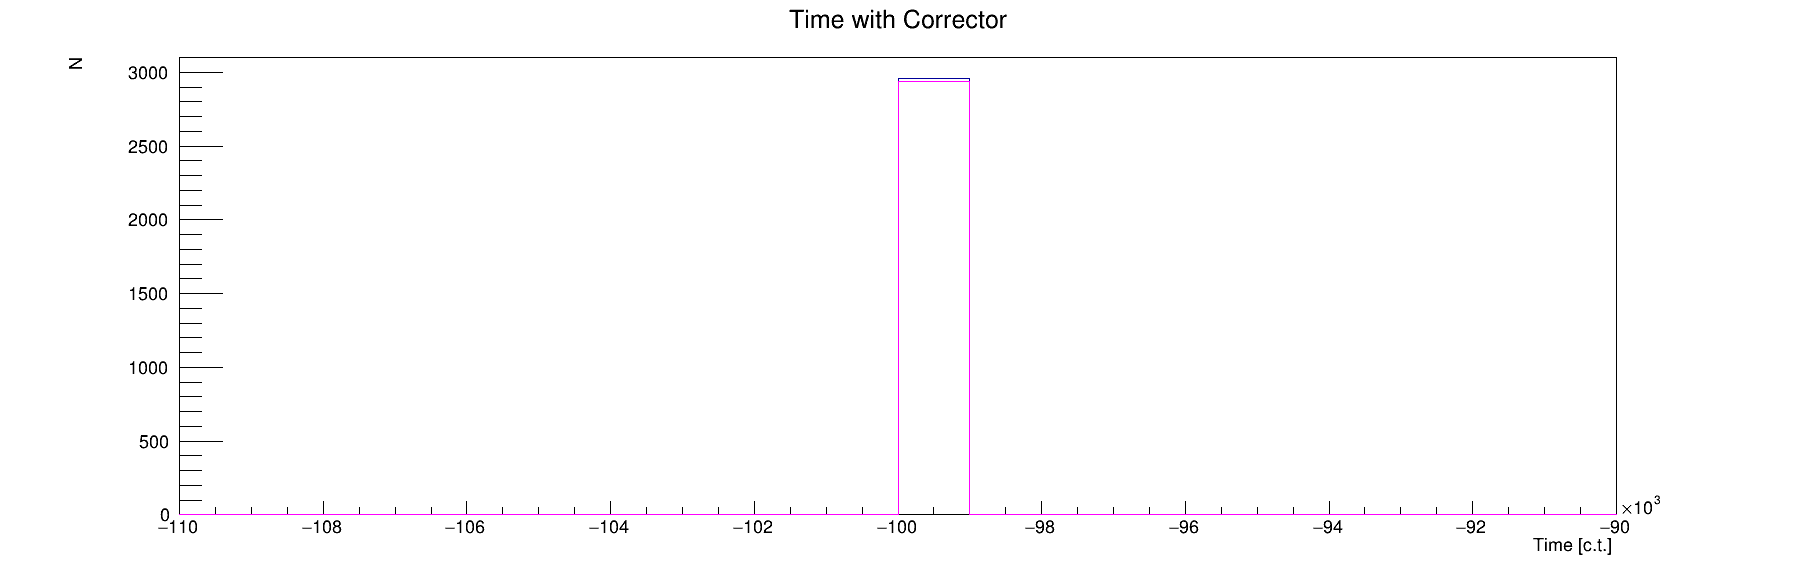

In [16]:
c = r.TCanvas("c","c",1800,600)

h1.GetXaxis().SetRangeUser(-110000,-90000)
h1.Draw()
h3.Draw("SAME")

c.Draw()

---

In [31]:
t0 = f1.Get("t0Analyzer/t0Tree")
t0.Print()

******************************************************************************
*Tree    :t0Tree    : t0Tree                                                 *
*Entries :      118 : Total =        28695144 bytes  File  Size =    8442030 *
*        :          : Tree compression factor =   3.40                       *
******************************************************************************
*Br    0 :tracetubeA : vector<int>                                           *
*Entries :      118 : Total  Size=    4735079 bytes  File Size  =    1063084 *
*Baskets :      118 : Basket Size=      32000 bytes  Compression=   4.45     *
*............................................................................*
*Br    1 :sampleNums : vector<unsigned int>                                  *
*Entries :      118 : Total  Size=    4735551 bytes  File Size  =    1659434 *
*Baskets :      118 : Basket Size=      32000 bytes  Compression=   2.85     *
*...................................................


****************************************
Minimizer is Linear
Chi2                      =      6834.67
NDf                       =           78
p0                        =      91.9943   +/-   105.36      
p1                        =   0.00239226   +/-   0.000895885 


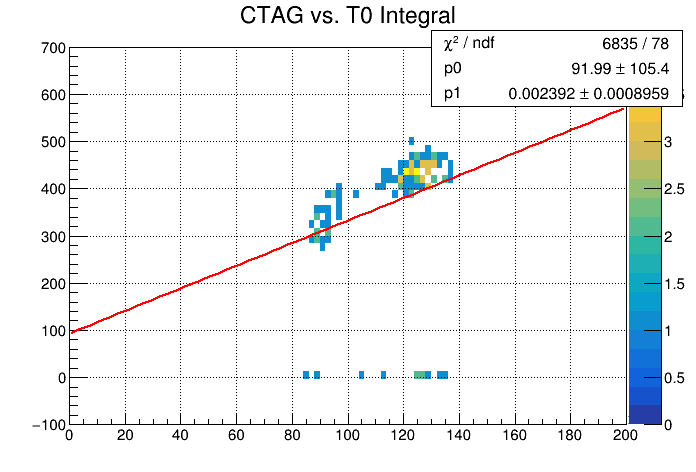

In [32]:
c = r.TCanvas()
h = r.TH2D("h","CTAG vs. T0 Integral",100,0,200000,50,-100,700)
t0.Draw("ctag:integraltubeA>>h","","colz")
#h.GetYaxis().SetRangeUser(-10,1000)
c.SetGrid()
h.Fit("pol1","")
c.Draw()

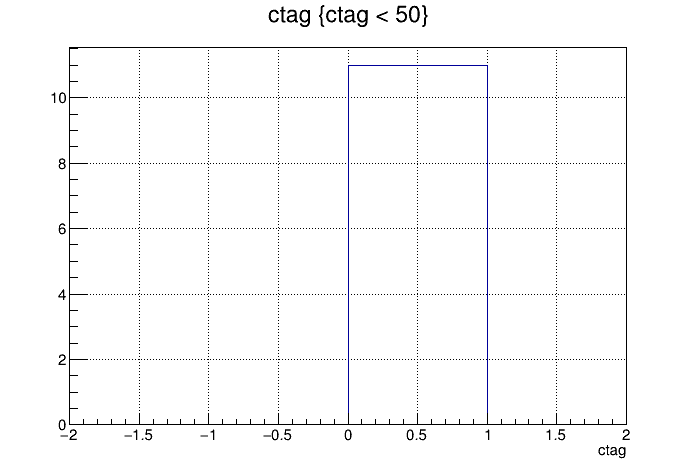

In [36]:
c = r.TCanvas()
t0.Draw("ctag","ctag < 50","colz")
c.SetGrid()
c.Draw()